# Filter Design for Accels/Gyros

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import signal
from numpy import pi

In [35]:
def plot(sys, title, fs):
    w, h = signal.freqz(*sys) # (b, a), fs default is Niquist (pi)
    hz = w *(0.5*fs/np.pi) # convert to Hz
    fig, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.plot(hz, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Hz')
    # ax1.set_xlabel('Frequency [rad/sample]')
    ax1.grid(True)
    # ax1.set_ylim([-120, 20])
    ax2 = ax1.twinx()
    angles = np.rad2deg(np.unwrap(np.angle(h)))
    ax2.plot(hz, angles, 'g')
    ax2.set_ylabel('Angle (deg)', color='g')
    ax2.grid(True)
    ax2.axis('tight')
    # ax2.set_ylim([-6, 1])
    nticks = 8
    ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
    ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

Num: [0.63974802 3.19874008 6.39748016 6.39748016 3.19874008 0.63974802]
Den: [1.         4.11092489 6.82622129 5.71524671 2.4102661  0.40927752]


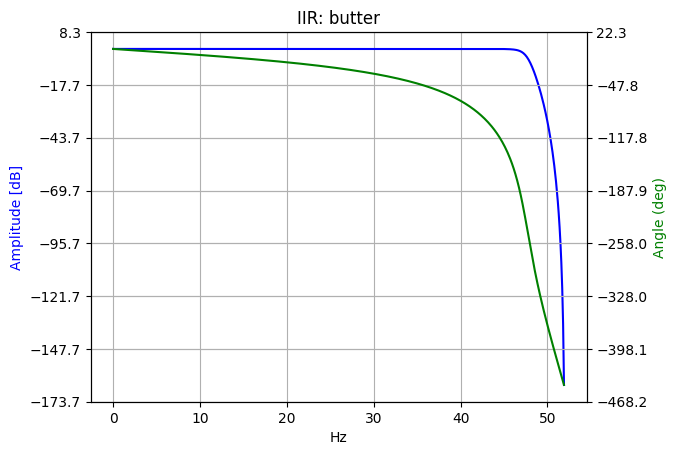

In [49]:
wp = 0.9 # 0-1, with 1 begin Niquist
ws = 0.95
gpass = 1 # dB
gstop =  20 # dB
fs = 104

ftype = "butter"
sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
print("Num:", sys[0])
print("Den:", sys[1])
plot(sys,"IIR: " + ftype, fs)

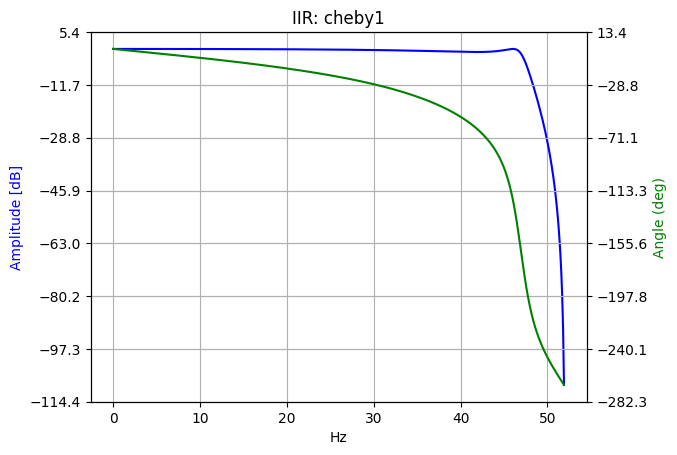

In [46]:
ftype = "cheby1"
sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
plot(sys,"IIR: " + ftype, fs)

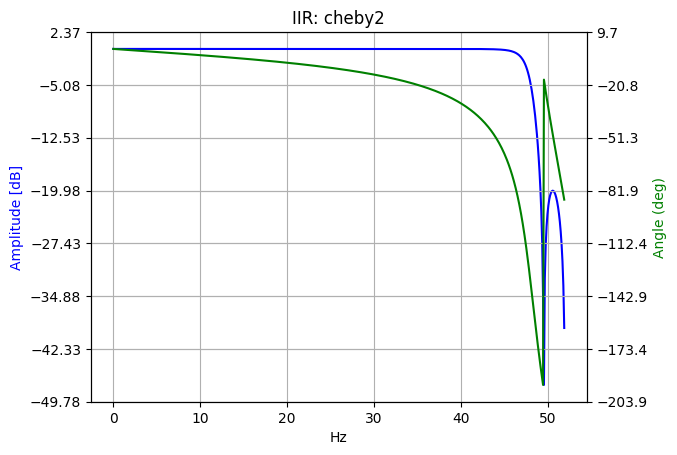

In [47]:
ftype = "cheby2"
sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
plot(sys,"IIR: " + ftype, fs)

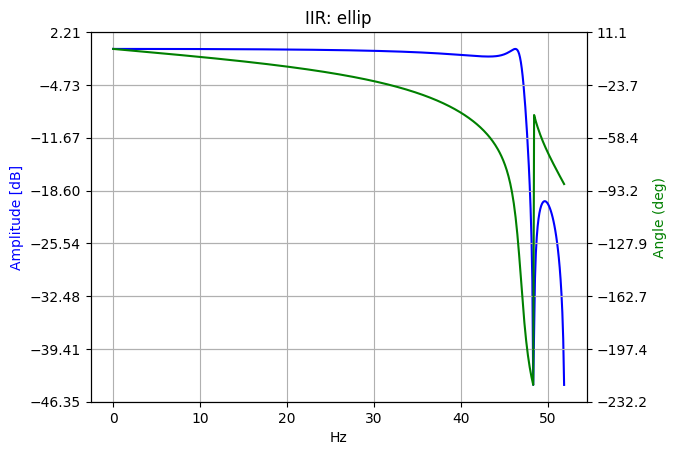

In [48]:
ftype = "ellip"
sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
plot(sys,"IIR: " + ftype, fs)